# Diffusion Processes on Complex Networks

## Assignment 4

Link to my GitLap repository with solution: https://gitlab.com/249755/diffusion-processes-on-complex-networks.git

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
import seaborn as sns
import pandas as pd

### Ex 1

Simulate a random walk of an agent on a square lattice. The program
should take a snapshot of the lattice in every time step and save it to a
jpg or png file. These files should then be used to generate a movie (avi
or animated gif).

I allowed my agent to "walk through walls" as on the torus, but visualised it on the lattice.

Helper function, which calculates next step:

In [2]:
def next_step(pos, size):
    steps = [[0, 1], [1, 0], [0, -1], [-1, 0]]
    steps = [np.array(step) for step in steps]
    step = steps[np.random.choice(4)]
    new_pos = pos + step
    left, right = size
    if new_pos[0] < left:
        new_pos[0] = right
    elif new_pos[0] > right:
        new_pos[0] = left
    if new_pos[1] < left:
        new_pos[1] = right
    elif new_pos[1] > right:
        new_pos[1] = left
    return new_pos

Function, which generates one random walk on lattice:

In [3]:
def random_walk_lattice(T, n, start = np.array([0, 0])):
    if n%2==1:
        left, right = -(n//2), n//2
    else:
        left = -(n/2)
        right = left + n - 1
    size = (left, right)
    x = [start[0]]
    y = [start[1]]
    for t in range(T):
        step = next_step(np.array([x[t], y[t]]), size)
        x.append(step[0])
        y.append(step[1])
    return x, y, size

Function, which saves one random walk as a gif file:

In [4]:
def gif_lattice(T, n, start = np.array([0, 0])):
    x, y, size = random_walk_lattice(T, n, start)
    list_of_jpg = []
    list_of_names = []
    plt.figure()
    for t in range(T):
        plt.gca().set_aspect('equal')
        plt.plot(x[0:t+1], y[0:t+1], '.')
        plt.grid()
        plt.xlim(size[0]-0.1, size[1]+0.1)
        plt.ylim(size[0]-0.1, size[1]+0.1)
        dest = 'ex1/' + str(t) + '.jpg'
        list_of_names.append(dest)
        plt.savefig(dest)
        list_of_jpg.append(imageio.imread(dest))
        plt.clf()
    imageio.mimsave('ex1/anim.gif', list_of_jpg, duration=0.2)  
    for i in range(len(list_of_names)): 
        os.remove(list_of_names[i])

In [5]:
# gif_lattice(100, 7)

Gif file is located in ex1 folder as anim.gif in l4 folder in my Git repository.

### Ex 2

Write a computer program to simulate Pearson’s random walk in the plane,
where the steps have constant length $a = 1$ and uniformly distributed
random angles. By simulating many long walks of $N$ steps (e.g. $N = 1000$)
starting from the origin, compute and plot normalized histograms (i.e. the
PDFs) of $AN$, the fraction of time steps when the walker is in right half
plane ($x > 0$) and of $BN$, the fraction of time the walker is in the first
quadrant ($x > 0$, $y > 0$). The expected values are clearly $\langle A_N\rangle=\frac{1}{2}$ and $\langle B_N\rangle=\frac{1}{4}$, 
but what are the most probable values? Plot several
trajectories to illustrate your results.

Function, which generates one random walk on plane:

In [6]:
def random_walk_plane(T):
    x = [0]
    y = [0]
    for t in range(T):
        theta = np.random.uniform(0, 2*np.pi)
        x.append(x[t] + np.cos(theta))
        y.append(y[t] + np.sin(theta))
    return x, y

Function, which saves one random walk on plane as a gif file.

In [7]:
def gif_plane(T):
    plt.figure()
    x, y = random_walk_plane(T)
    plane_size = [[min(x), max(x)], [min(y), max(y)]]
    list_of_jpg = []
    list_of_names = []
    for t in range(T):
        plt.gca().set_aspect('equal')
        plt.plot(x[0:t+1], y[0:t+1], '.-')
        plt.grid()
        plt.xlim(plane_size[0][0]-0.1, plane_size[0][1]+0.1)
        plt.ylim(plane_size[1][0]-0.1, plane_size[1][1]+0.1)
        dest = 'ex2/' + str(t) + '.jpg'
        list_of_names.append(dest)
        plt.savefig(dest)
        list_of_jpg.append(imageio.imread(dest))
        plt.clf()
    imageio.mimsave('ex2/anim.gif', list_of_jpg, duration=0.2)  
    for i in range(len(list_of_names)): 
        os.remove(list_of_names[i])


In [8]:
# gif_plane(100)

Gif file is located in ex2 folder as anim.gif in l4 folder in my Git repository.

Function, which analyses random walks:

In [9]:
def analyze_plane(T, MC):
    AN = []
    BN = []
    for i in range(MC):
        x, y = random_walk_plane(T)
        AN.append(sum(np.array(x)>0)/T)
        BN.append(sum((np.array(x)>0) & (np.array(y)>0))/T)
    plt.subplot(121)
    sns.histplot(AN, stat = 'probability')
    plt.title('$x>0$')
    plt.subplot(122)
    sns.histplot(BN, stat = 'probability')
    plt.title('$x>0$, $y>0$')
    plt.tight_layout()
    return np.mean(AN), np.mean(BN)

(0.50005, 0.241253)

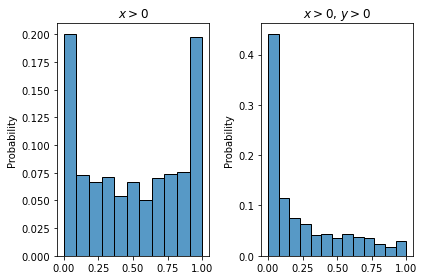

In [10]:
analyze_plane(1000, 1000)

Expected values are 0.5 and 0.25.

### Ex 3

Write a program that will illustrate a random walk on a given graph (avi or animated gif) 
and for a given origin node will estimate average hitting times of all other nodes.
Compare the results for graphs of different topologies. Set $N = 20$ for
visualization purposes and $N = 100$ otherwise.

In [11]:
from l3 import *

Function which generates lattice as graph:

In [42]:
def lattice_graph(N):
    if np.sqrt(N)%1 == 0:
        n = int(np.sqrt(N))
        new_connections = []
        nodes_matrix = np.reshape(np.arange(N), (n, n))
        for i in range(N):
            new_connections.extend([[i, nodes_matrix[i//n][i%n-1]],    
                                    [i, nodes_matrix[i//n-1][i%n]]])
        g = Graph()
        g.add_edges_from_list(new_connections)
        return g

Function which generates one random walk on given graph:

In [41]:
def random_walk_graph(graph, T, start_node=0):
    current = start_node
    walk = [start_node]
    for t in range(T):
        next = np.random.choice(graph.get_neighbors(current))
        walk.append(next)
        current = graph.get_vertex(next).id
    return walk

In [43]:
random_walk_graph(lattice_graph(25), 10, 0)

[0, 1, 2, 7, 6, 11, 16, 17, 12, 17, 12]

Helper function for visualise graph with steps of random walk:

In [44]:
def visualise(graph, steps, t):
        x = []
        y = []
        n = len(graph.get_vertices())
        angle = 2*np.pi/(n)
        for i in range(n):
            angle_i = i*angle
            x.append(np.cos(angle_i))
            y.append(np.sin(angle_i))
        plt.gca().set_aspect('equal')
        plt.plot(x, y, '.', alpha=0.5)
        for i in range(n):
            plt.text(x[i], y[i], str(graph.get_vertices()[i]), fontsize=12)
        for edge in graph.get_edges():
            plt.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], 'bo-', 
                                                                        alpha=0.5)
        for i in range(t+1):
            plt.plot([x[steps[i]], x[steps[i+1]]], [y[steps[i]], y[steps[i+1]]], 
                                                                'ro-', alpha=0.5)

Function, which saves one random walk on given graph as a gif file.

In [45]:
def gif_graph(graph, T, start_node=0, name='anim'):
    plt.figure()
    walk = random_walk_graph(graph, T, start_node)
    # print(walk)
    list_of_jpg = []
    list_of_names = []
    for t in range(T):
        visualise(graph, walk, t)
        dest = 'ex3/' + str(t) + '.jpg'
        list_of_names.append(dest)
        plt.savefig(dest)
        list_of_jpg.append(imageio.imread(dest))
        plt.clf()
    imageio.mimsave('ex3/' + name + '.gif', list_of_jpg, duration=0.2)  
    for i in range(len(list_of_names)): 
        os.remove(list_of_names[i])

Saving 4 animations on graphs to gif files:

Lattice:

In [51]:
# gif_graph(lattice_graph(25), 30, 0, 'lattice_anim')

Erdos-Renji:

In [53]:
# gif_graph(Erdos_Renji(20, 0.3), 50, 0, 'ER_anim')

Watts-Strogatz:

In [56]:
# gif_graph(Watts_Strogatz(20, 4, 0.2), 40, 0, 'WS_anim')

Barabasi-Albert:

In [61]:
# gif_graph(Barabasi_Albert(20, 1, 1), 30, 0, 'BA_anim')

Gif file are located in ex3 folder as BA_anim.gif, ER_anim.gif, lattice_anim.gif and WS_anim.gif in l4 folder in my Git repository.

Fuction which calculates and analyses average hitting times for given graph and node:

In [204]:
def analyse_avg_hitting_times(graph, start_node, T, MC):
    hitting_times = []
    not_reach = []
    for i in range(MC):
        walk = random_walk_graph(graph, T, start_node)
        one_ht = np.zeros(graph.num_vertices)
        one_not_reach = np.zeros(graph.num_vertices)
        for vertex, i in enumerate(graph.get_vertices()):
            try:
                one_ht[i] = walk.index(vertex)
            except:
                one_ht[i] = None
                one_not_reach[i] += 1
        hitting_times.append(one_ht)
        not_reach.append(one_not_reach)
    avg_hitting_times = np.nanmean(np.array(hitting_times), axis=0)
    sum_not_reach = np.array(not_reach).sum(axis=0)
    df = pd.DataFrame({'avg_hitting_times': avg_hitting_times, 
                'sum_not_reach': sum_not_reach, 'degrees': degrees(graph)['degrees']})
    avg_hitting_times = df.sort_values('degrees', ascending=False)['avg_hitting_times']
    sum_not_reach = df.sort_values('degrees', ascending=False)['sum_not_reach']
    labels = [str(tick) for tick in df.sort_values('degrees', ascending=False).index]
    plt.figure(1, figsize=(20, 10))
    plt.bar(labels, avg_hitting_times)
    plt.tight_layout()
    plt.title('AVG hitting times for each node sorted by degree')
    plt.figure(2, figsize=(20, 10))
    plt.bar(labels, sum_not_reach)
    plt.tight_layout()
    plt.title("Sum of times, when node wasn't achieved sorted by degree")
    plt.figure(3)
    plt.hist(sum_not_reach)
    plt.title("Histogram of sums of times, when node wasn't achieved")
    # return list(avg_hitting_times)

Lattice:

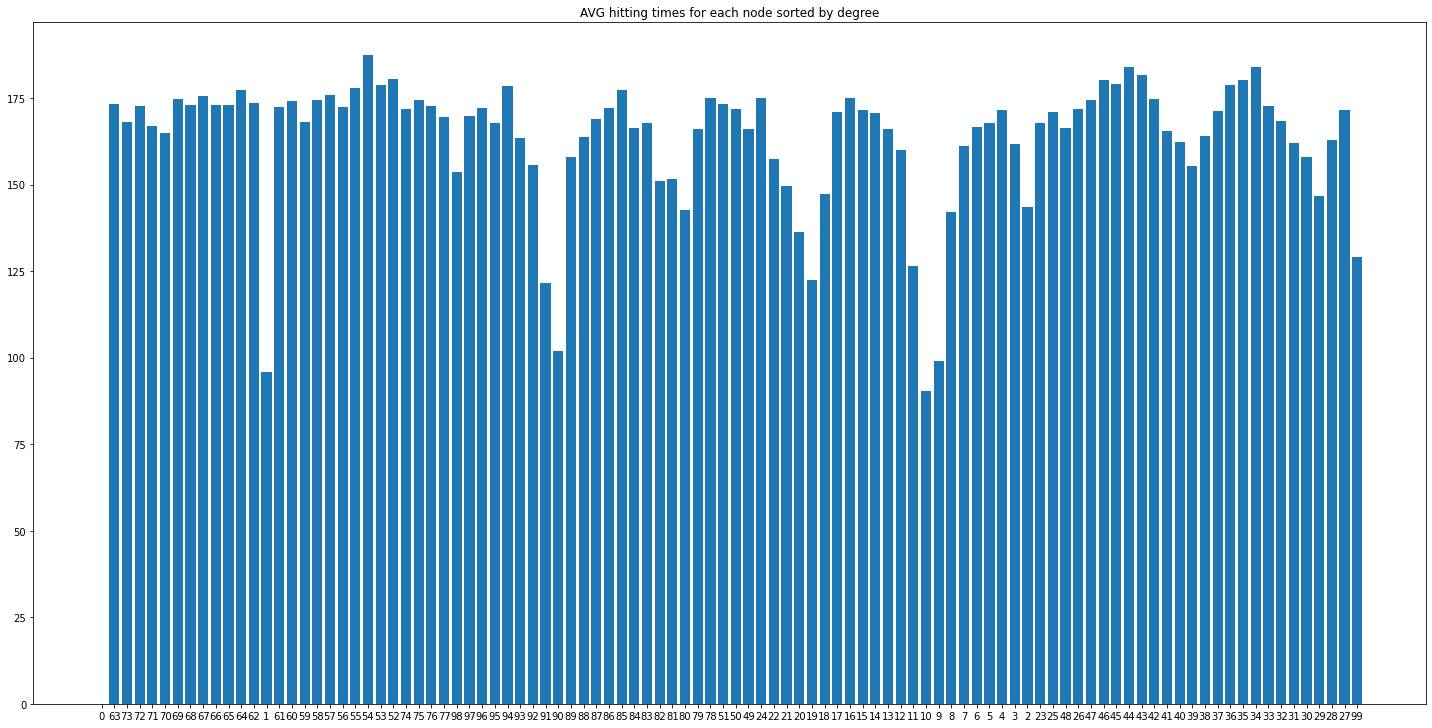

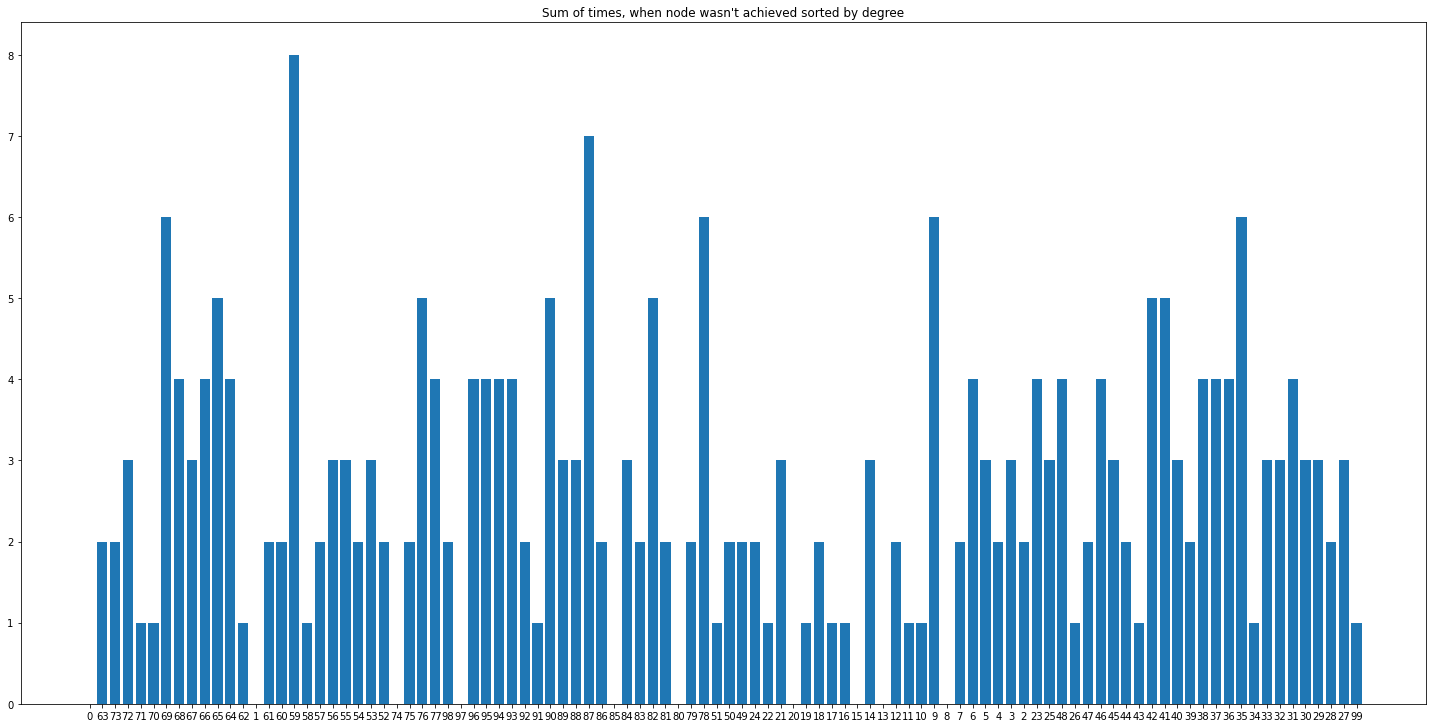

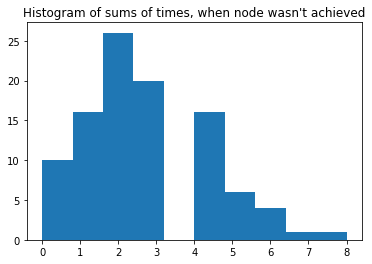

In [205]:
analyse_avg_hitting_times(lattice_graph(100), 0, 1000, 1000)

Erdos-Renji:

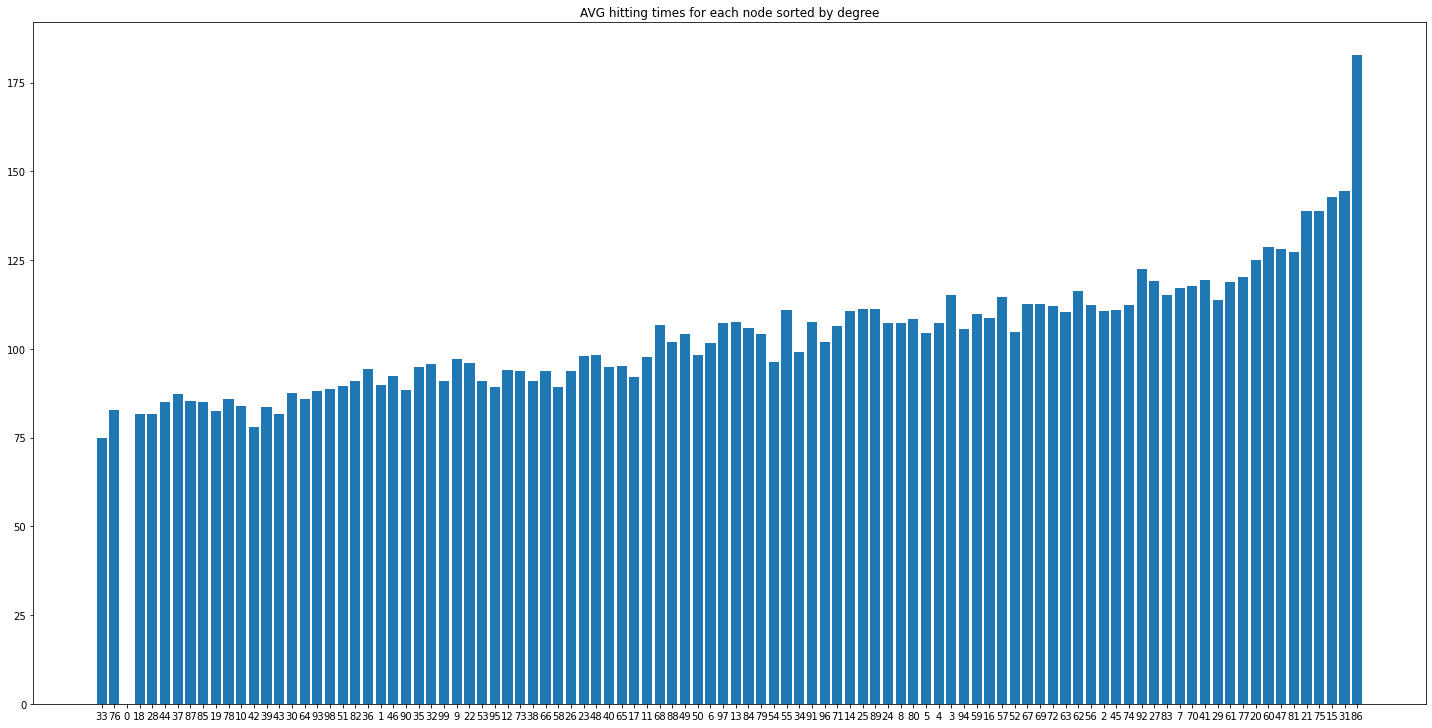

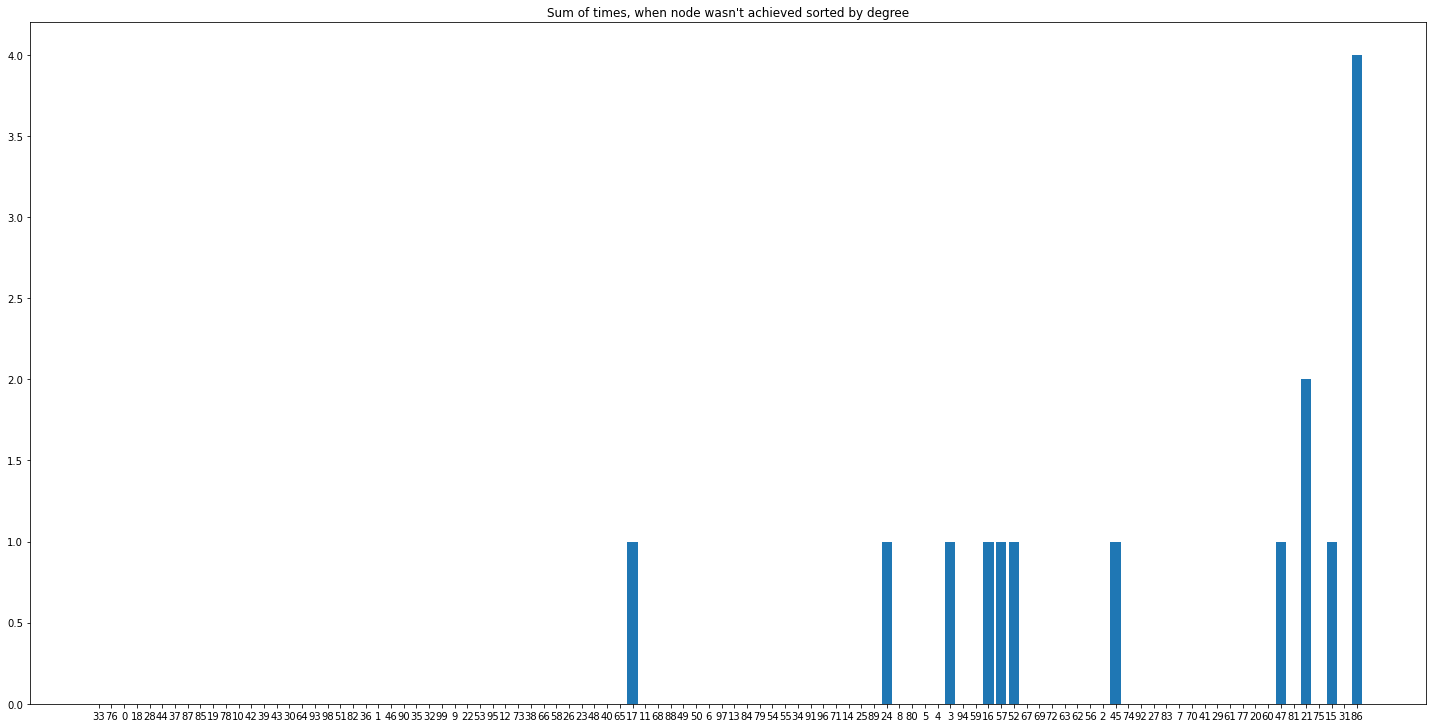

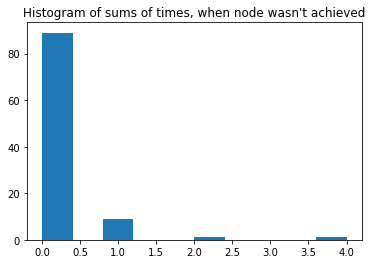

In [206]:
analyse_avg_hitting_times(Erdos_Renji(100, 0.3), 0, 1000, 1000)

Watts-Strogatz:

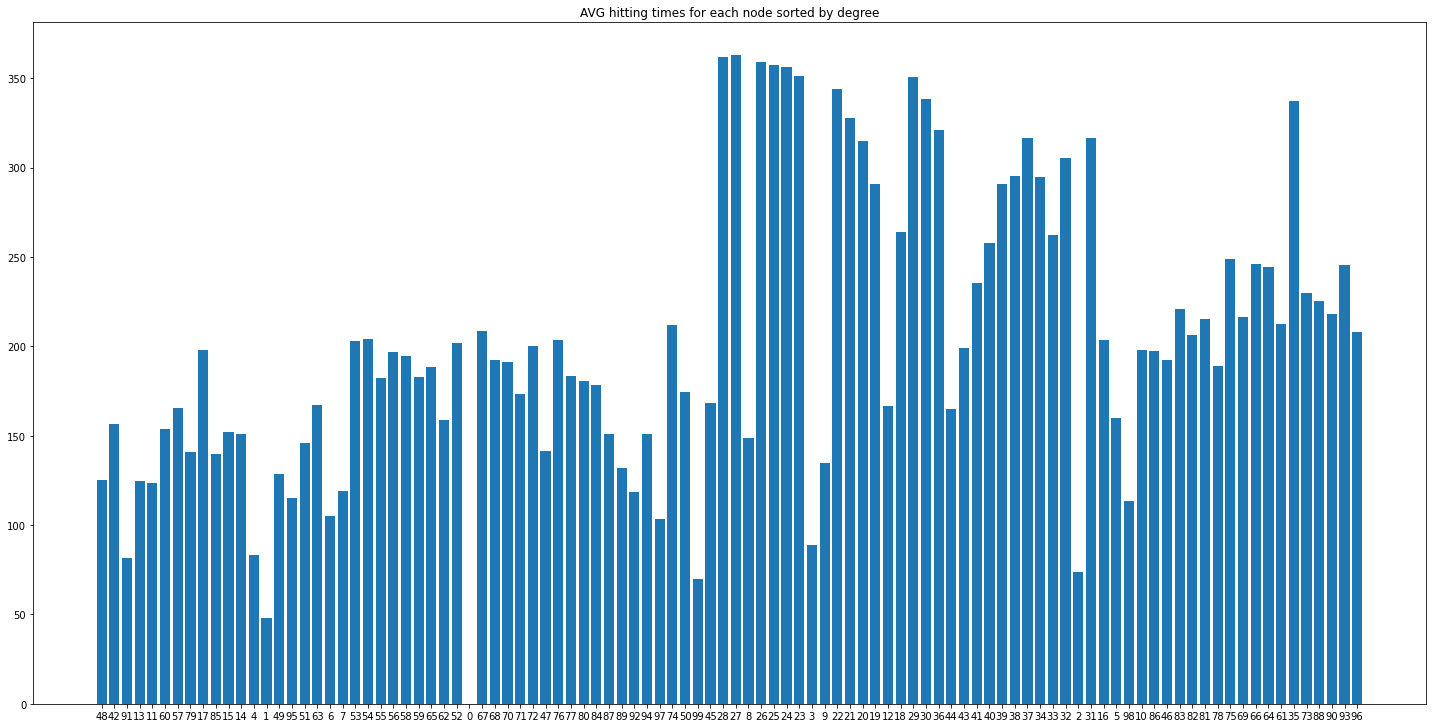

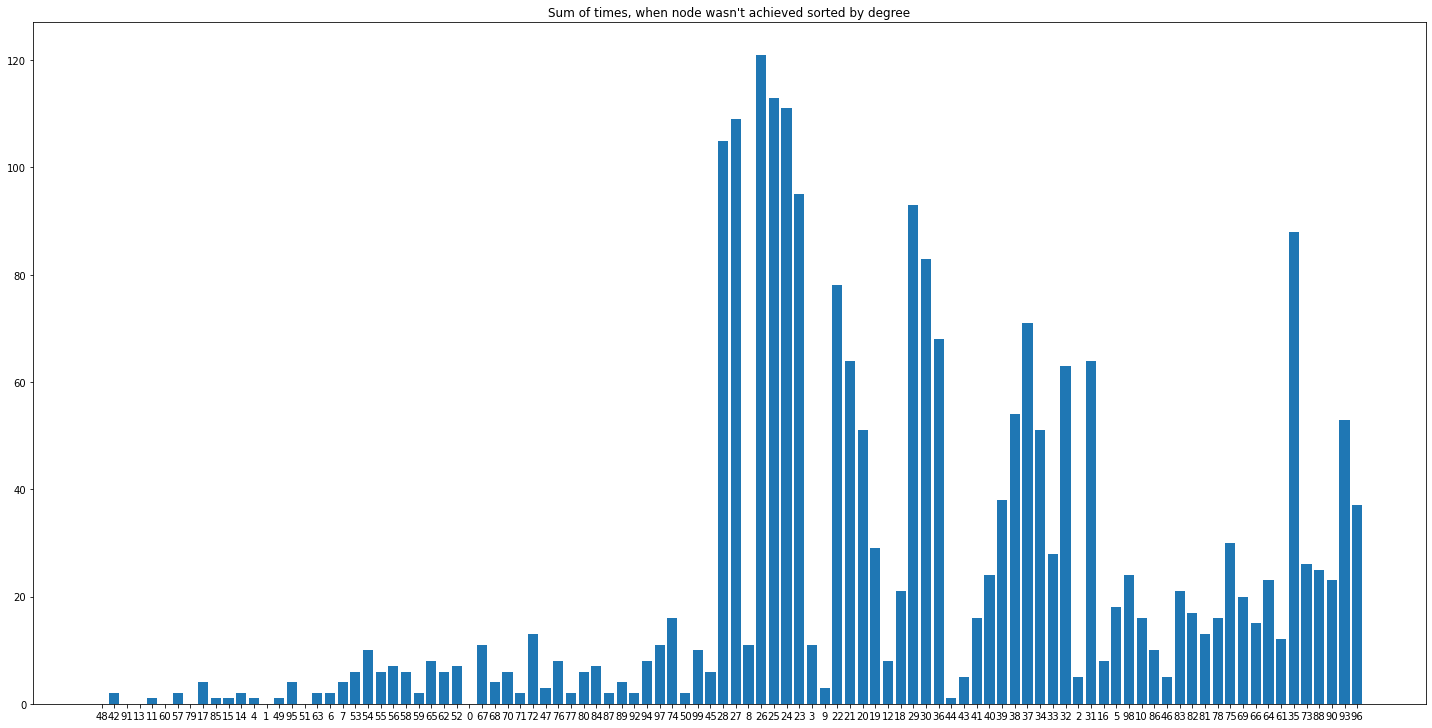

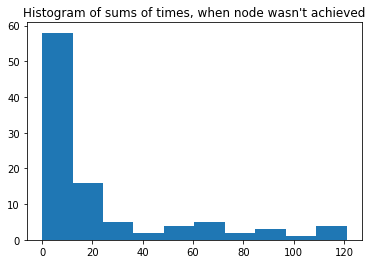

In [207]:
analyse_avg_hitting_times(Watts_Strogatz(100, 4, 0.2), 0, 1000, 1000)

Barabasi-Albert:

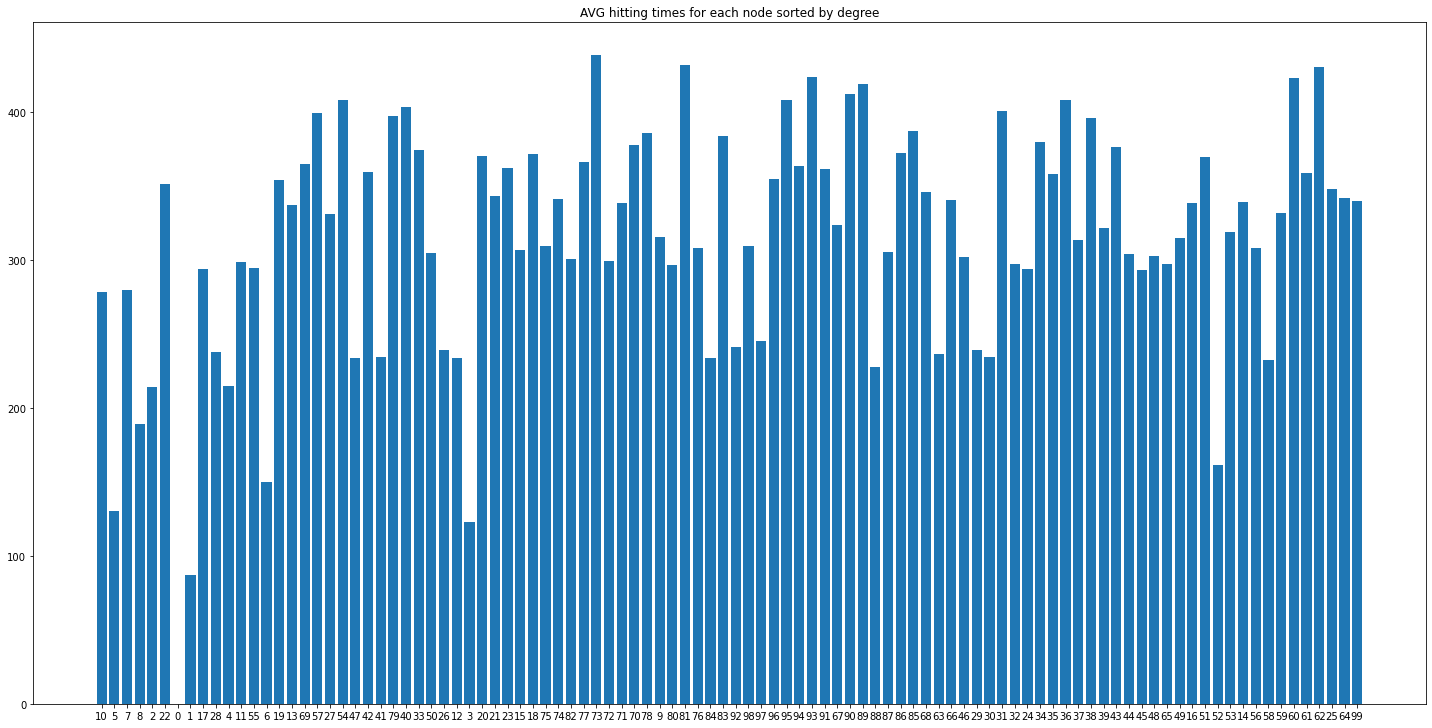

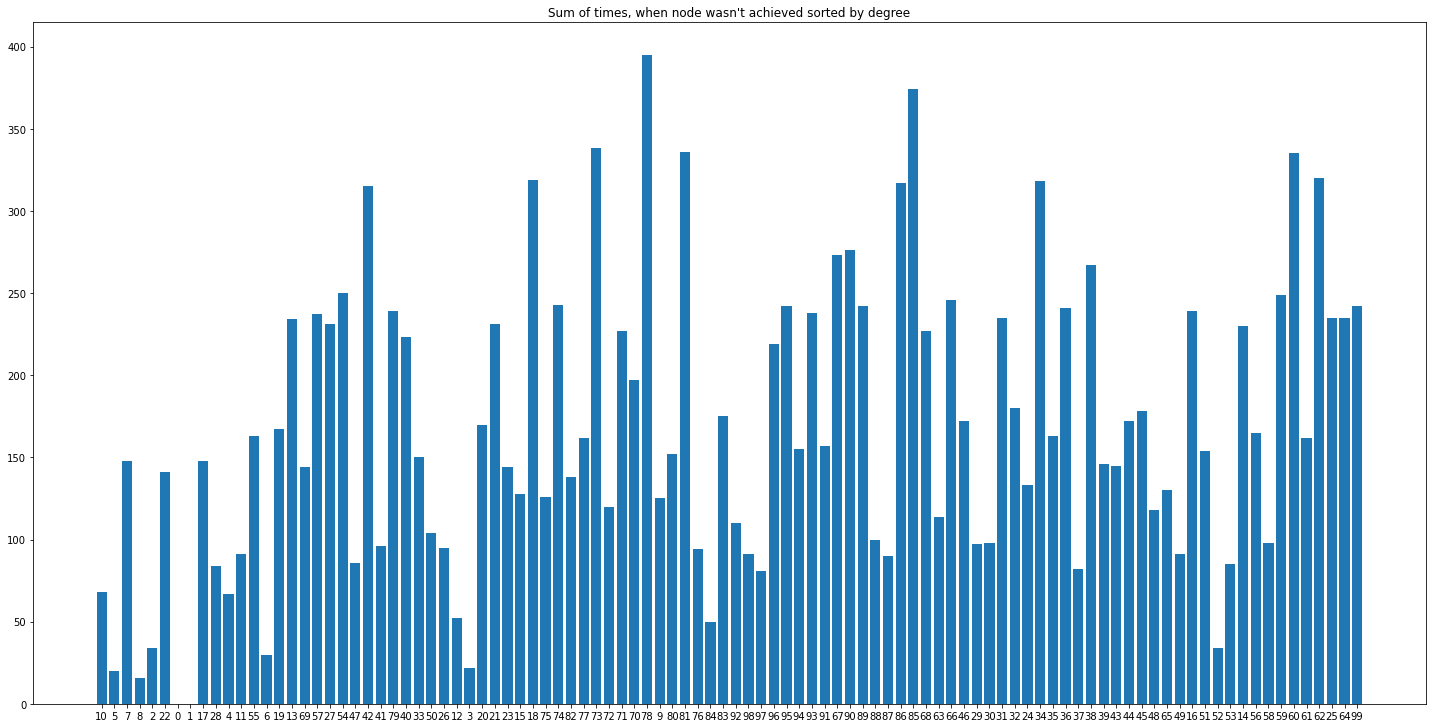

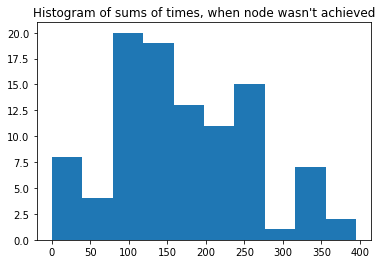

In [208]:
analyse_avg_hitting_times(Barabasi_Albert(100, 1, 1), 0, 1000, 1000)